# Dynamic Pharmacophores

Dynamic pharmacophores are obtained from a molecular dynamics simulation of a protein-ligand complex. In this notebook we will obtain pharmacophores from a 10 ns trajectory of the ERalpha. 

Different methods have been proposed for obtaining pharmacophores from a molecular dynamics, some are very simple and some more complex. We will explore different methods implemented in OpenPharmacophore.

In [3]:
%matplotlib inline
from openpharmacophore.dynophore import Dynophore
from IPython.display import Image
import mdtraj as md

## Pharmacophores from a molecular dynamics trajectory

First we load the trajectory file with mdtraj.

In [4]:
traj_file = "../../data/trajectories/ERalpha.h5"
traj = md.load(traj_file)
print(traj)
print(traj.topology)

<mdtraj.Trajectory with 1000 frames, 27425 atoms, 8028 residues, and unitcells>
<mdtraj.Topology with 4 chains, 8028 residues, 27425 atoms, 19689 bonds>


### Pharmacophores from the first and last frame only

A very simple way of obtaining pharmacophores from a trajectory is just to extract a pharmacophore from the first and las frame of the trajectory.

To work with trajectories we will use the Dynophore class. The constructor expects a trajectory object. This class is different from the other pharmacophore classes.

First, we will use the first_and_last_pharmacophore method. We can get a list of all extracted pharmacophores from the trajectory with the attribute pharmacophores.

In [6]:
dynophore = Dynophore(traj)
dynophore.first_and_last_pharmacophore()
dynophore.pharmacophores

[StructuredBasedPharmacophore(n_elements: 9),
 StructuredBasedPharmacophore(n_elements: 6)]

In [7]:
dynophore.pharmacophores[0].elements

[HbAcceptorSphereAndVector(center: (28.34, 17.742, 25.083); radius: 1.0; direction: (0.4886, -0.87, -0.066)),
 HbAcceptorSphereAndVector(center: (37.768, 12.081, 23.029); radius: 1.0; direction: (-0.6034, 0.2741, 0.7489)),
 HbDonorSphereAndVector(center: (28.34, 17.742, 25.083); radius: 1.0; direction: (0.1793, 0.4914, 0.8523)),
 HbDonorSphereAndVector(center: (37.768, 12.081, 23.029); radius: 1.0; direction: (-0.3717, -0.9283, 0.0118)),
 HydrophobicitySphere(center: (33.452, 15.524, 23.64); radius: 1.0),
 HydrophobicitySphere(center: (31.2353, 16.7123, 24.6887); radius: 1.0),
 HydrophobicitySphere(center: (30.49, 15.3043, 23.3997); radius: 1.0),
 HydrophobicitySphere(center: (35.225, 12.201, 24.116); radius: 1.0),
 HydrophobicitySphere(center: (36.287, 12.367, 21.152); radius: 1.0)]

In [7]:
dynophore.pharmacophores[0].show()

NGLWidget()

In [8]:
dynophore.pharmacophores[-1].elements

[HbAcceptorSphereAndVector(center: (21.4, 23.433, 23.959); radius: 1.0; direction: (0.9029, 0.0437, 0.4276)),
 HbAcceptorSphereAndVector(center: (32.187, 20.784, 24.975); radius: 1.0; direction: (-0.8643, 0.3032, 0.4012)),
 HbDonorSphereAndVector(center: (21.4, 23.433, 23.959); radius: 1.0; direction: (-0.9257, -0.2297, 0.3006)),
 HydrophobicitySphere(center: (24.896, 20.102, 23.084); radius: 1.0),
 HydrophobicitySphere(center: (30.969, 19.259, 23.494); radius: 1.0),
 HydrophobicitySphere(center: (25.44, 22.574, 23.702); radius: 1.0)]

In [9]:
dynophore.pharmacophores[-1].show()

NGLWidget()

We can see that the pharmacophore model obtained from the initial frame differs from the last frame pharmacophore.

### Pharmacophore Analysis

To do a bit of a more sophisticated analysis, we can start by obtaining a pharmacophore model for each frame of the trajectory. We can use the pharmacophores_from_frames method which expects a list of frame indices. This can take a while. 

### Get Pharmacophores for each frame of the trajectory

In [11]:
dynophore = Dynophore(traj)
frames = list(range(0, traj.n_frames))
dynophore.pharmacophores_from_frames(frames, load_ligand=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [13]:
print(f"Number of pharmacophores {len(dynophore.pharmacophores)}\n")
# Print first three pharmacophores
print(dynophore.pharmacophores[0:3])

Number of pharmacophores 1000

[StructuredBasedPharmacophore(n_elements: 9), StructuredBasedPharmacophore(n_elements: 6), StructuredBasedPharmacophore(n_elements: 7)]


### Get all unique pharmacophoric points

Once we have a lot of pharmacophores, we can analyze the frequency of the pharmacophoric points in the trajectory. We cas use the pharmacophoric_point_frequency method to get a dataframe with each unique pharmacophoric point and its frequency.

In [14]:
dynophore.pharmacophoric_point_frequency()

,index,Feature Name,Frequency,Atoms Indices
0,1,hb acceptor 2,0.991,{18}
1,0,hb acceptor 1,0.879,{3}
2,2,hb donor 1,0.811,{3}
3,9,hydrophobicity 6,0.599,{4}
4,3,hb donor 2,0.561,{18}
5,5,hydrophobicity 2,0.488,{0}
6,8,hydrophobicity 5,0.323,{16}
7,7,hydrophobicity 4,0.269,{19}
8,11,hydrophobicity 8,0.228,{1}
9,13,hydrophobicity 10,0.224,{15}


All unique pharmacophoric points are stored in a list that can be accessed by the attribute unique_pharmacophoric_points

In [15]:
unique_points = dynophore.unique_pharmacophoric_points
print(f"Number of unique points is {len(unique_points)}")

Number of unique points is 19


### Derive a pharmacophore model from the most frequent points

Another method to get a pharmacophore from a MD trajectory is to get a single pharmacophore model with the points that are above a certain frequency value. Here we get a pharmacophore model with all the points that have a frequency higher than 50%. 

In [16]:
freq_threshold = 0.5
frequency_pharmacophore = dynophore.pharmacophore_by_frequency(freq_threshold)
print(frequency_pharmacophore)
print(frequency_pharmacophore.elements)

Pharmacophore(n_elements: 5)
[HbAcceptorSphere(center: (25.0894, 20.0576, 23.4682); radius: 1.0), HbAcceptorSphere(center: (34.3315, 14.9745, 25.9307); radius: 1.0), HbDonorSphere(center: (25.1247, 19.8936, 23.3244); radius: 1.0), HbDonorSphere(center: (34.0505, 14.3638, 26.2629); radius: 1.0), HydrophobicitySphere(center: (27.0897, 18.2293, 23.3299); radius: 1.0)]


### Analyze frequency of all unique points

We can also plot the frequency of the pharmacophoric points across the trajectory. This way we can have an idea of the freqency through time.

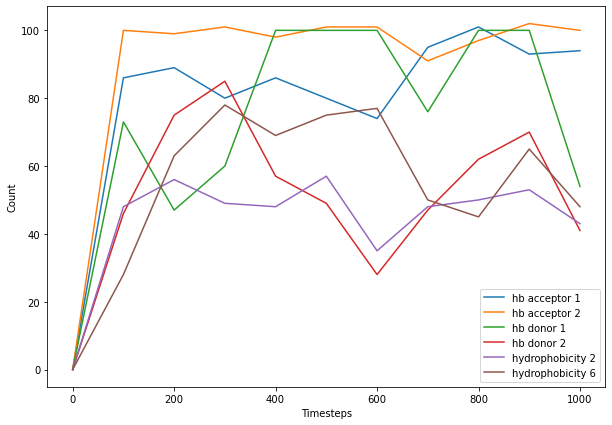

<AxesSubplot:xlabel='Timesteps', ylabel='Count'>

In [17]:
# Set the frequency threshold to a high value (40%) so that the plot doesn't look too crowded.

freq_threshold = 0.5
dynophore.point_frequency_plot(0.4)

We can create a pharmacophore from this unique pharmacophoric points

In [18]:
# Create a pharmacophore with the following elements:
elements = ["hb acceptor 1", "hb acceptor 2", "hb donor 1", "hb donor 2"]
custom_pharmacophore = dynophore.pharmacophore_from_unique_points(elements)
custom_pharmacophore

Pharmacophore(n_elements: 4)

### 2D Representation of the Dynamic Pharmacophore

Another way to represent a pharmacophore is with a 2D representation of the ligand. In this representation the pharmacophoric points are highligted with it's frequency value. All values have been rounded.

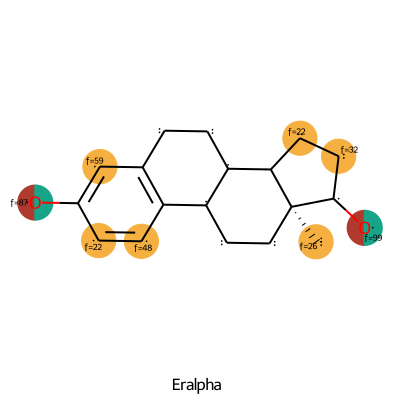

In [23]:
img_file = "./dynophore.png"
dynophore.draw(img_file, img_size=(400, 400), legend="Eralpha", freq_threshold=0.2)
Image(img_file)

### Representative Pharmacophore Models

Representative pharmcophore models (RPMs) are those that have the same pharmacophoric points [3]. We can get all RPMs by callign the following method:

In [24]:
rpms = dynophore.representative_pharmacophore_models()

In [26]:
print(f"{len(rpms)} representative pharmacophore models")
# Print first three
print(rpms[0:3])

95 representative pharmacophore models
[StructuredBasedPharmacophore(n_elements: 6), StructuredBasedPharmacophore(n_elements: 7), StructuredBasedPharmacophore(n_elements: 7)]


### Common Hits Approach

<strong>References</strong>

[1] Wieder, Marcus, Ugo Perricone, Thomas Seidel, Stefan Boresch, and Thierry Langer. "Comparing pharmacophore models derived from crystal structures and from molecular dynamics simulations." Monatshefte für Chemie-Chemical Monthly 147, no. 3 (2016): 553-563.

[2] Wieder, Marcus, Ugo Perricone, Thomas Seidel, and Thierry Langer. "Pharmacophore models derived from molecular dynamics simulations of protein-ligand complexes: A case study." Natural product communications 11, no. 10 (2016): 1934578X1601101019.

[3] Wieder, Marcus, Arthur Garon, Ugo Perricone, Stefan Boresch, Thomas Seidel, Anna Maria Almerico, and Thierry Langer. "Common hits approach: combining pharmacophore modeling and molecular dynamics simulations." Journal of chemical information and modeling 57, no. 2 (2017): 365-385
